In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tiktok = pd.read_csv('tiktok_cleaned.csv')
ig = pd.read_csv('ig_cleaned.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\m-syr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


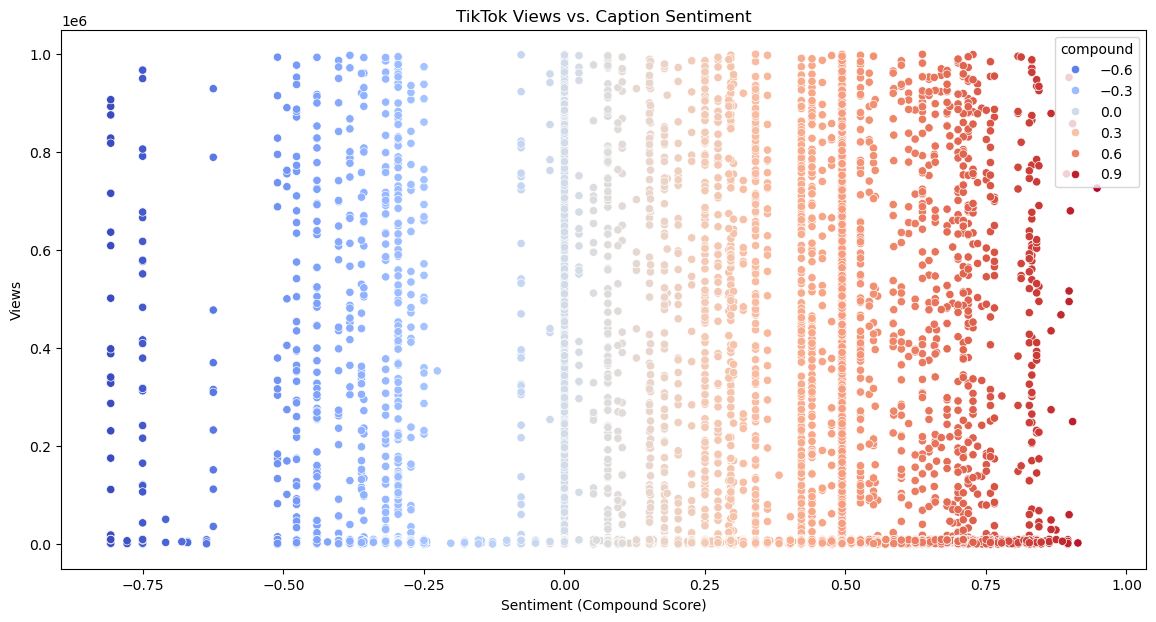

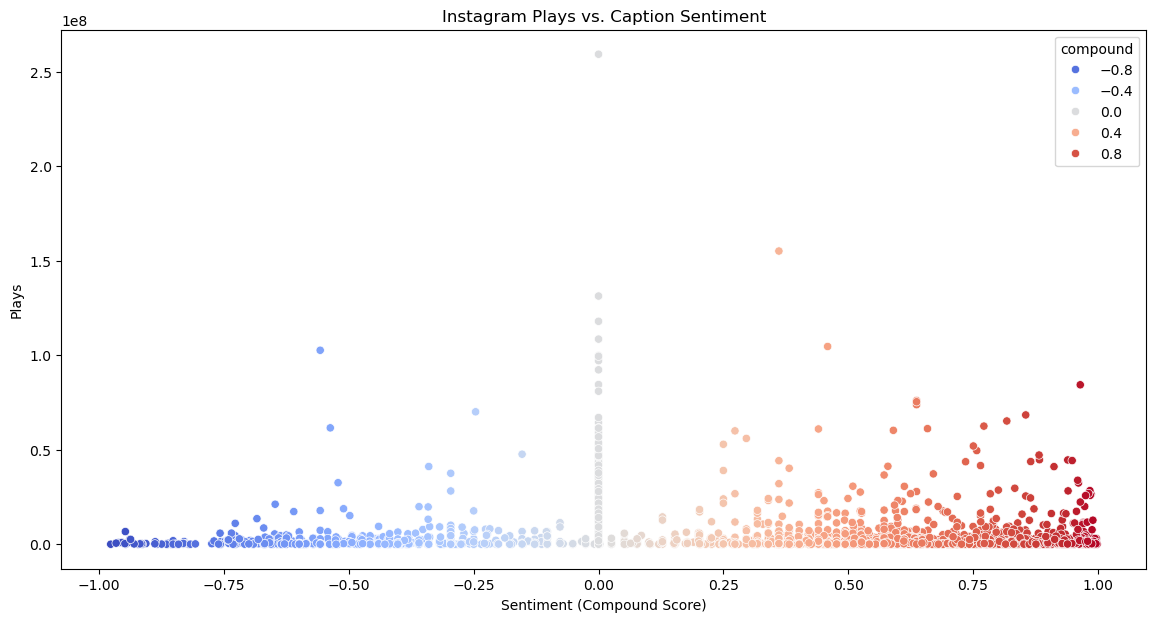

In [3]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(caption):
    if isinstance(caption, str):
        return sid.polarity_scores(caption)
    else:
        return {"neg": None, "neu": None, "pos": None, "compound": None}

# Apply sentiment analysis on TikTok captions
tiktok['sentiment_scores'] = tiktok['caption'].apply(get_sentiment_scores)
tiktok = pd.concat([tiktok.drop(['sentiment_scores'], axis=1), tiktok['sentiment_scores'].apply(pd.Series)], axis=1)

# Apply sentiment analysis on Instagram captions
ig['sentiment_scores'] = ig['caption'].apply(get_sentiment_scores)
ig = pd.concat([ig.drop(['sentiment_scores'], axis=1), ig['sentiment_scores'].apply(pd.Series)], axis=1)

# Analyze the relationship between sentiment and views (TikTok)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=tiktok, x='compound', y='views', hue='compound', palette='coolwarm')
plt.title('TikTok Views vs. Caption Sentiment')
plt.xlabel('Sentiment (Compound Score)')
plt.ylabel('Views')
plt.show()

# Analyze the relationship between sentiment and plays (Instagram)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=ig, x='compound', y='plays', hue='compound', palette='coolwarm')
plt.title('Instagram Plays vs. Caption Sentiment')
plt.xlabel('Sentiment (Compound Score)')
plt.ylabel('Plays')
plt.show()